Saving cv lab 1.jpg to cv lab 1.jpg


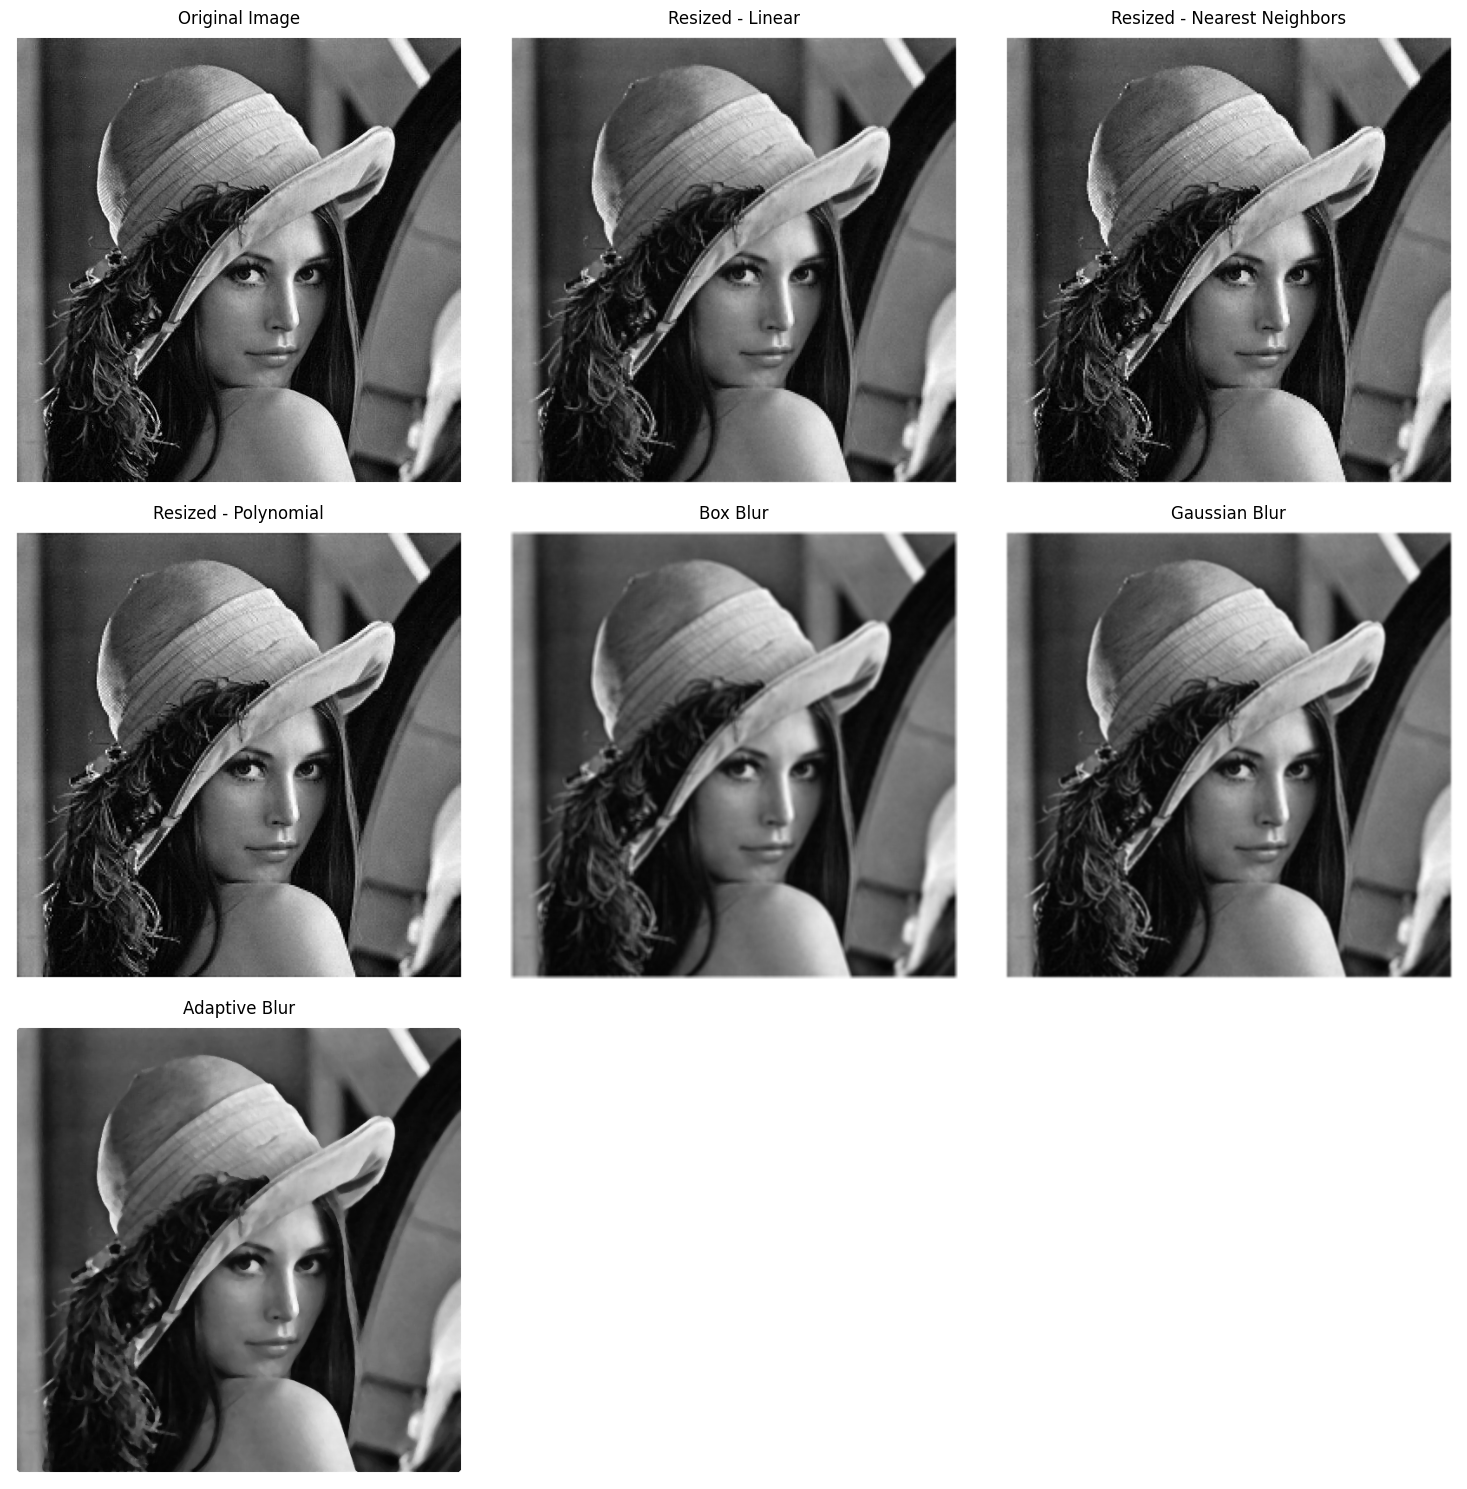

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

linear_resized = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
plt.subplot(3, 3, 2)
plt.imshow(linear_resized)
plt.title("Resized - Linear")
plt.axis('off')

nearest_resized = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
plt.subplot(3, 3, 3)
plt.imshow(nearest_resized)
plt.title("Resized - Nearest Neighbors")
plt.axis('off')

polynomial_resized = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.subplot(3, 3, 4)
plt.imshow(polynomial_resized)
plt.title("Resized - Polynomial")
plt.axis('off')

box_blur = cv2.blur(image, (5, 5))
plt.subplot(3, 3, 5)
plt.imshow(box_blur)
plt.title("Box Blur")
plt.axis('off')

gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
plt.subplot(3, 3, 6)
plt.imshow(gaussian_blur)
plt.title("Gaussian Blur")
plt.axis('off')

adaptive_blur = cv2.medianBlur(image, 5)
plt.subplot(3, 3, 7)
plt.imshow(adaptive_blur)
plt.title("Adaptive Blur")
plt.axis('off')

plt.tight_layout()
plt.show()



Naive Bayes Evaluation Metrics:
Accuracy: 0.8111
Precision: 0.8480
Recall: 0.8111
F1 Score: 0.8151
Confusion Matrix:
[[33  0  0  0  1  1  0  0  1  0]
 [ 0 29  1  0  0  0  1  0  3  2]
 [ 0  3 19  0  0  0  0  0 13  0]
 [ 0  0  1 26  0  0  0  1  8  1]
 [ 0  2  0  0 26  0  1  6  1  0]
 [ 0  0  0  0  0 35  0  1  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  4  1  0  0  0  0  1 29  0]
 [ 0  3  1  0  0  0  0  4  3 25]]

Random Forest Evaluation Metrics:
Accuracy: 0.9611
Precision: 0.9620
Recall: 0.9611
F1 Score: 0.9609
Confusion Matrix:
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  1  0  0  0  0]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  2 30  0]
 [ 0  0  0  1  0  0  0  1  1 33]]


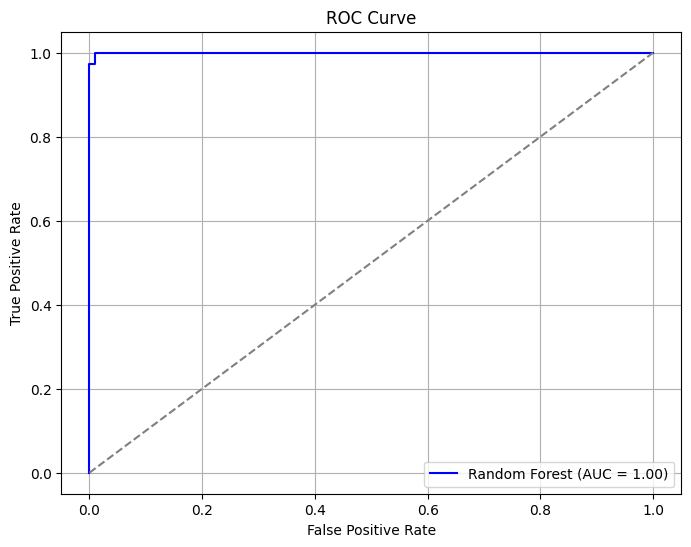

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb_model = GaussianNB()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

nb_accuracies = cross_val_score(nb_model, X_train, y_train, cv=kfold, scoring='accuracy')
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

rf_accuracies = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='accuracy')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    return acc, prec, rec, f1, cm

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_rf, "Random Forest")

y_test_binary = (y_test == 0).astype(int)
y_score_rf = rf_model.predict_proba(X_test)[:, 0]  # Probability for class '0'

fpr, tpr, _ = roc_curve(y_test_binary, y_score_rf)
auc_score = roc_auc_score(y_test_binary, y_score_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
